In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Problem 1: Linear Regression

You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

Questions for Problem 1:

1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [4]:
df = pd.read_csv("Firm_level_data.csv")

In [5]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [6]:
df.tail()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [8]:
df.shape

(759, 9)

In [9]:
df.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

There are 21 entries missing in tobinq coloumn.

In [12]:
len(df.columns)

9

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


UNIVARIATE ANALYSIS

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

8

In [15]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of sales
----------------------------------------------------------------------------
count       759.000000
mean       2689.705158
std        8722.060124
min           0.138000
25%         122.920000
50%         448.577082
75%        1822.547366
max      135696.788200
Name: sales, dtype: float64 Distribution of sales
----------------------------------------------------------------------------


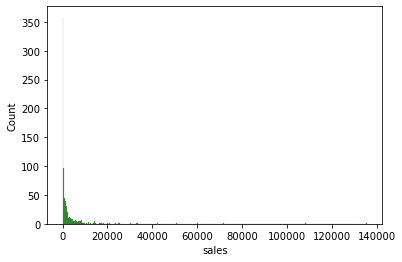

BoxPlot of sales
----------------------------------------------------------------------------


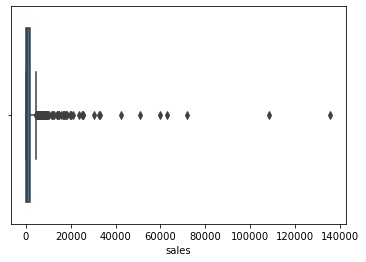

Description of capital
----------------------------------------------------------------------------
count      759.000000
mean      1977.747498
std       6466.704896
min          0.057000
25%         52.650501
50%        202.179023
75%       1075.790020
max      93625.200560
Name: capital, dtype: float64 Distribution of capital
----------------------------------------------------------------------------


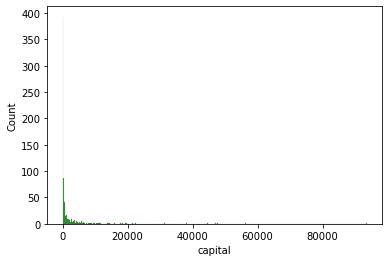

BoxPlot of capital
----------------------------------------------------------------------------


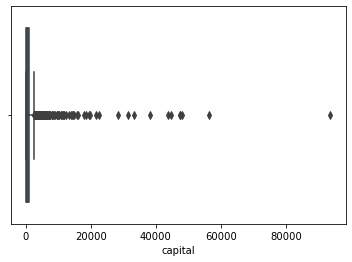

Description of patents
----------------------------------------------------------------------------
count     759.000000
mean       25.831357
std        97.259577
min         0.000000
25%         1.000000
50%         3.000000
75%        11.500000
max      1220.000000
Name: patents, dtype: float64 Distribution of patents
----------------------------------------------------------------------------


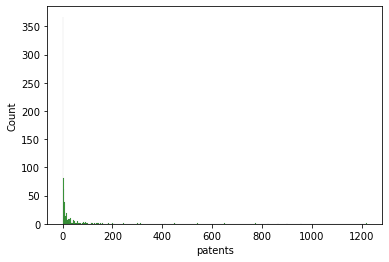

BoxPlot of patents
----------------------------------------------------------------------------


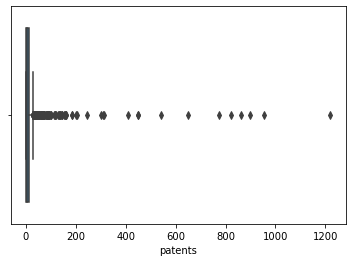

Description of randd
----------------------------------------------------------------------------
count      759.000000
mean       439.938074
std       2007.397588
min          0.000000
25%          4.628262
50%         36.864136
75%        143.253403
max      30425.255860
Name: randd, dtype: float64 Distribution of randd
----------------------------------------------------------------------------


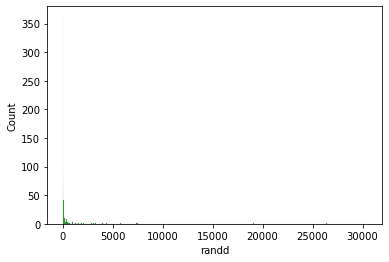

BoxPlot of randd
----------------------------------------------------------------------------


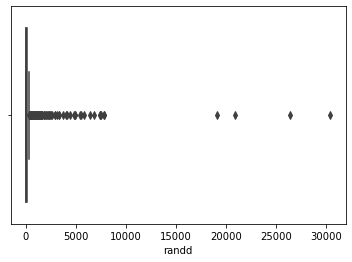

Description of employment
----------------------------------------------------------------------------
count    759.000000
mean      14.164519
std       43.321443
min        0.006000
25%        0.927500
50%        2.924000
75%       10.050001
max      710.799925
Name: employment, dtype: float64 Distribution of employment
----------------------------------------------------------------------------


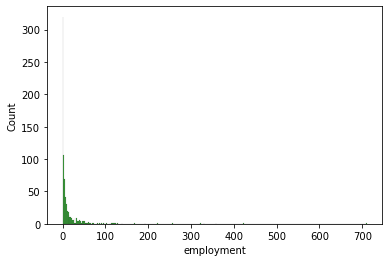

BoxPlot of employment
----------------------------------------------------------------------------


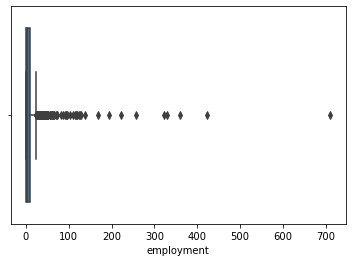

Description of tobinq
----------------------------------------------------------------------------
count    738.000000
mean       2.794910
std        3.366591
min        0.119001
25%        1.018783
50%        1.680303
75%        3.139309
max       20.000000
Name: tobinq, dtype: float64 Distribution of tobinq
----------------------------------------------------------------------------


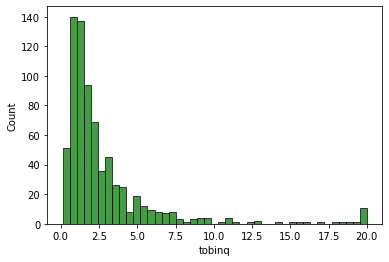

BoxPlot of tobinq
----------------------------------------------------------------------------


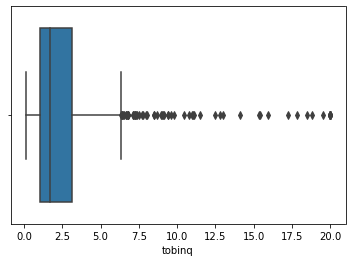

Description of value
----------------------------------------------------------------------------
count      759.000000
mean      2732.734750
std       7071.072362
min          1.971053
25%        103.593946
50%        410.793529
75%       2054.160386
max      95191.591160
Name: value, dtype: float64 Distribution of value
----------------------------------------------------------------------------


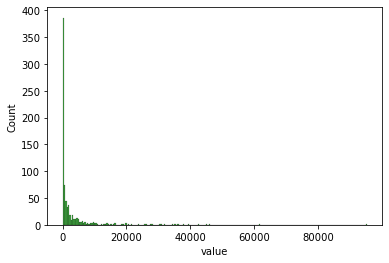

BoxPlot of value
----------------------------------------------------------------------------


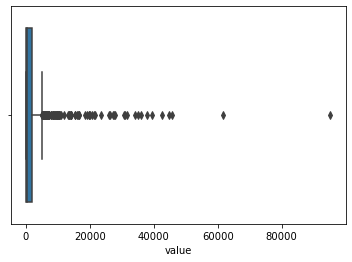

Description of institutions
----------------------------------------------------------------------------
count    759.000000
mean      43.020540
std       21.685586
min        0.000000
25%       25.395000
50%       44.110000
75%       60.510000
max       90.150000
Name: institutions, dtype: float64 Distribution of institutions
----------------------------------------------------------------------------


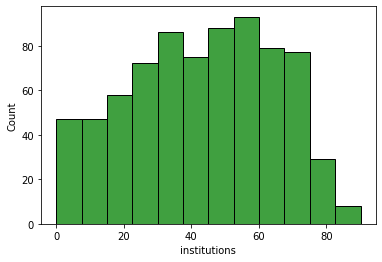

BoxPlot of institutions
----------------------------------------------------------------------------


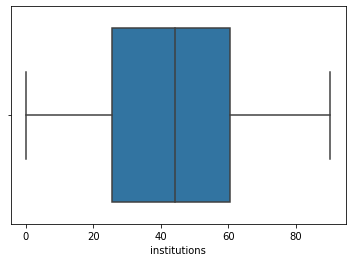

In [16]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

There seem to be many outliers in the data. Maximum number of sales are 135696 million dollars  but average sales are 2689 million dollars only. 

In [17]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of sp500
----------------------------------------------------------------
no     542
yes    217
Name: sp500, dtype: int64


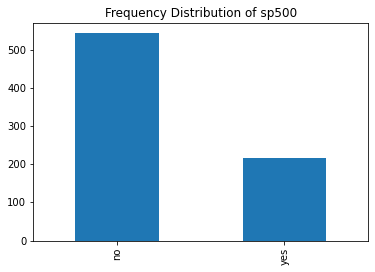

In [18]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

217 firms have membership in the S&P 500 index while 542 firms don't have membership in sp500.

BIVARIATE ANALYSIS

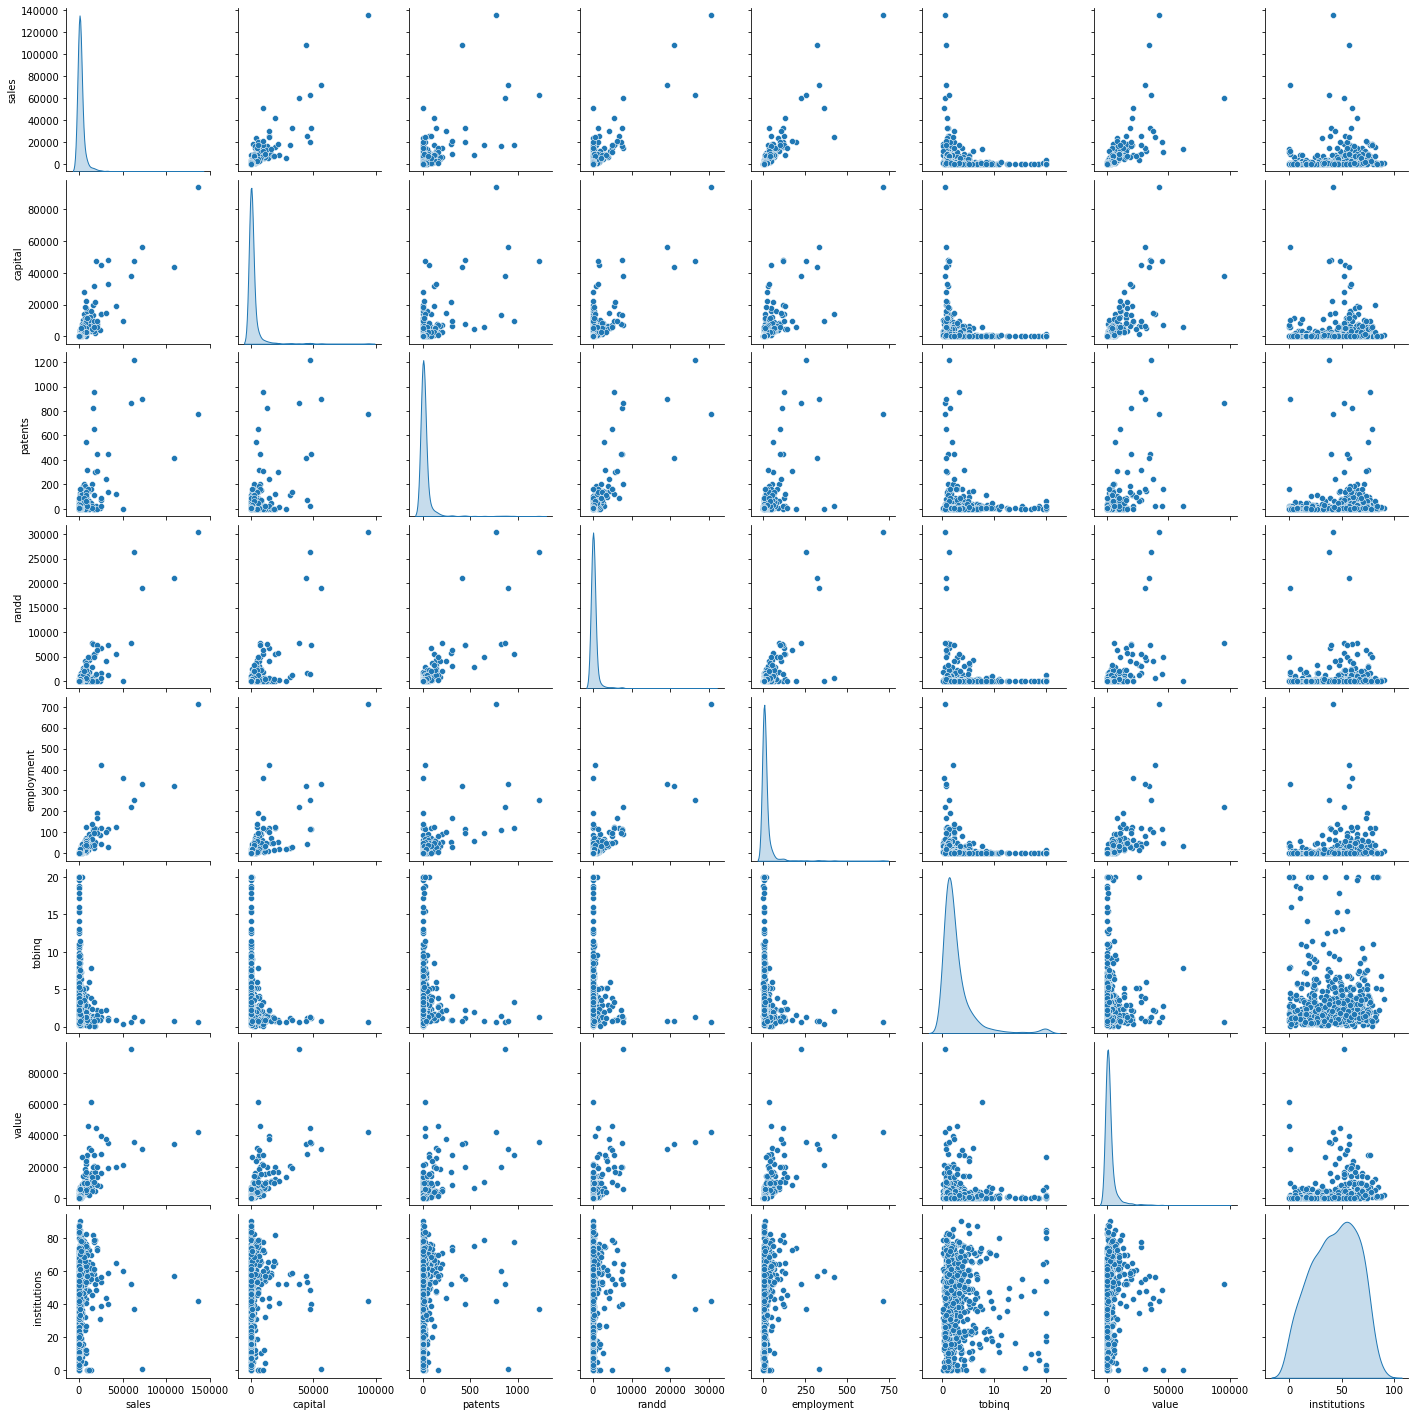

In [19]:
cData_attr = df.iloc[:, 0:9]
sns.pairplot(
    cData_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

Observe that the relationship between 'Sales' and other attributes is not really linear.

However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.

Several assumptions of classical linear regression seem to be violated

MULTIVARIATE ANALYSIS

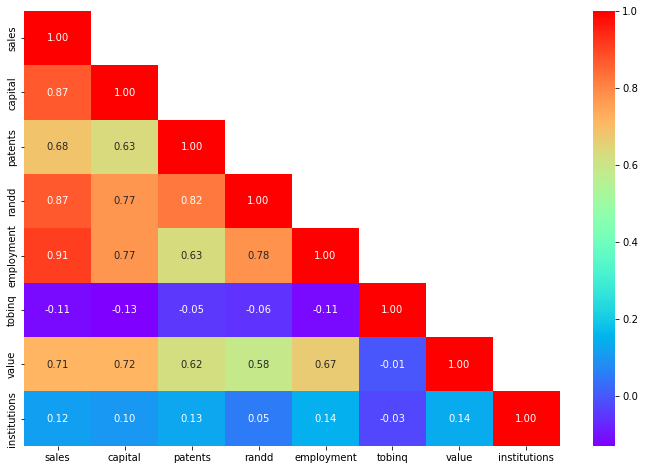

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:9].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:9].corr(),+1))
plt.show()

There seems to be a very high correlation between sales & capital coloumn, randd & patents coloumn, employment & sales coloumn, tobinq seems to have a negative correlation with other attributes. 

1.2) Impute null values if present? Do you think scaling is necessary in this case?

In [21]:
df.duplicated().sum()

0

No duplicates

In [22]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

There are 21 entries missing in tobinq coloumn. These need to be treated. We won't drop the null values instead we will replace them with the median value of the coloumn itself.

In [23]:
df.median()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11104\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


sales           448.577082
capital         202.179023
patents           3.000000
randd            36.864136
employment        2.924000
tobinq            1.680303
value           410.793529
institutions     44.110000
dtype: float64

So we create 2 simple true or false columns with titles equivalent to sp500_yes & sp500_No.

We will also be dropping one of those two columns to ensure there is no linear dependency between the two columns.

In [24]:
df = pd.get_dummies(df, columns=["sp500"], drop_first=True)
df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,0


In [25]:
medianFiller = lambda x: x.fillna(x.median())
dfnew = df.apply(medianFiller, axis=0)

In [26]:
dfnew.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
tobinq          0
value           0
institutions    0
sp500_yes       0
dtype: int64

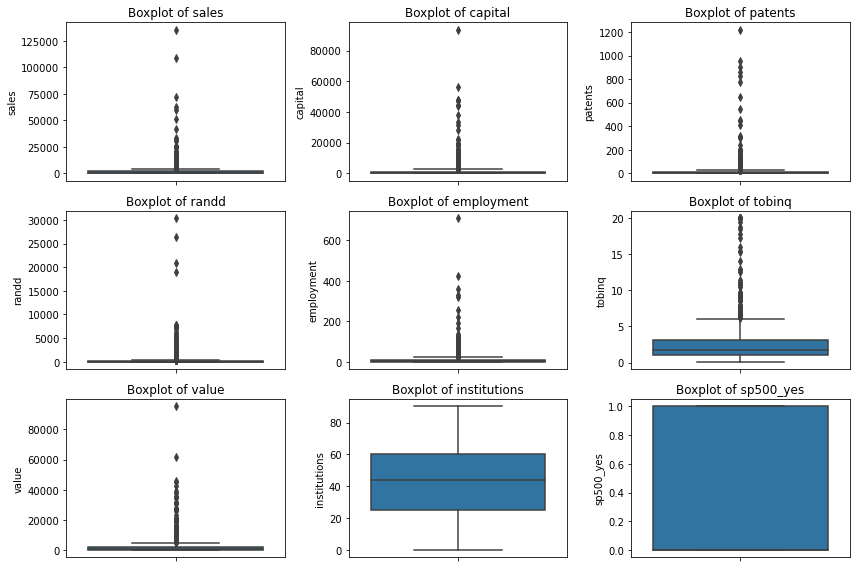

In [27]:
plt.figure(figsize = (12,8))
feature_list = dfnew.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = dfnew[feature_list[i]], data = dfnew)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [28]:
from scipy.stats import zscore
dfnews = dfnew.apply(zscore)
dfnews.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.028842,-0.273914,2.493756,-0.156696,1.718839,-0.632747
1,-0.261802,-0.287143,-0.245190,-0.219303,-0.284216,-0.577847,-0.352317,0.738279,-0.632747
2,0.656027,0.656624,1.154052,1.424056,0.819869,0.734749,3.273585,0.215929,1.580410
3,-0.256841,-0.264737,-0.255479,-0.177659,-0.256243,-0.740066,-0.377803,-0.744789,-0.632747
4,-0.288514,-0.284354,-0.245190,-0.212208,-0.282206,-0.511899,-0.377183,0.297142,-0.632747


There are many outliers in the data. Scaling is necessary in this case as sales and randd are in million of dollars and other variables are having smaller units. To ensure that the model is predicting well we need to scale it before proceeding. 

1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

# Split Data

In [29]:
# independent variables
X = dfnews.drop(["sales"], axis=1)
# dependent variable
y = dfnews[["sales"]]

In [30]:
X = sm.add_constant(X)

We will now split X and y into train and test sets in a 70:30 ratio.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [32]:
print(X_train.head())

     const   capital   patents     randd  employment    tobinq     value  \
626    1.0 -0.102446 -0.111439 -0.182776    0.053299 -0.333052 -0.070880   
333    1.0 -0.303676 -0.245190 -0.214691   -0.314105 -0.717031 -0.385324   
257    1.0 -0.222758 -0.059996 -0.175741   -0.174105 -0.191825 -0.242456   
173    1.0 -0.181128 -0.265767 -0.184957   -0.151469  0.116599 -0.072309   
242    1.0 -0.243753 -0.245190 -0.219303   -0.291376 -0.183503 -0.336054   

     institutions  sp500_yes  
626     -0.532988  -0.632747  
333     -0.984276  -0.632747  
257      1.228328  -0.632747  
173      1.230635   1.580410  
242      1.956480  -0.632747  


In [33]:
print(X_test.head())

     const   capital   patents     randd  employment    tobinq     value  \
480    1.0 -0.298194 -0.255479 -0.195788   -0.300685 -0.529094 -0.381837   
622    1.0 -0.293509 -0.234901 -0.194253   -0.248644 -0.452728 -0.363394   
638    1.0 -0.132883 -0.070285 -0.180110    0.111415 -0.259944 -0.087443   
389    1.0 -0.295400 -0.234901 -0.196957   -0.299368 -0.150969 -0.375077   
748    1.0 -0.258258 -0.245190 -0.179909   -0.251785 -0.307684 -0.311286   

     institutions  sp500_yes  
480     -0.373791  -0.632747  
622     -1.113941  -0.632747  
638      0.227003   1.580410  
389     -0.847690  -0.632747  
748     -1.244528  -0.632747  


In [34]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [35]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     960.3
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          1.37e-306
Time:                        02:05:36   Log-Likelihood:                -13.768
No. Observations:                 531   AIC:                             45.54
Df Residuals:                     522   BIC:                             84.01
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0036      0.011     -0.329   

How to check for Multicollinearity

There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of Thumb:

If VIF is 1, then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all.
If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

The purpose of the analysis should dictate which threshold to use.

In [36]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const           1.003437
capital         3.454206
patents         5.453357
randd           7.314665
employment      3.171786
tobinq          1.041429
value           2.972769
institutions    1.295102
sp500_yes       1.646031
dtype: float64



The VIF values indicate that the features patents and randd are correlated with one or more independent features.

Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of patents and randd variables.

To treat multicollinearity, we will have to drop one or more of the correlated features (patents,randd).

We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [37]:
X_train2 = X_train.drop(["patents"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.936 
Adjusted R-squared: 0.935


On dropping 'patents', there is no change in adj. R-squared.

In [38]:
X_train3 = X_train.drop(["randd"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.928 
Adjusted R-squared: 0.928


On dropping 'randd', adj R square dropped by 0.007

In [39]:
X_train4 = X_train.drop(["capital"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.907 
Adjusted R-squared: 0.906


On dropping 'capital', adjusted Rsquare dropped by 0.029

In [40]:
X_train5 = X_train.drop(["employment"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.871 
Adjusted R-squared: 0.869


On dropping 'employment', adjusted Rsquare dropped by 0.066 , employment seem to be a significant variable hence can't be dropped. 

In [41]:
X_train6 = X_train.drop(["tobinq"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.936 
Adjusted R-squared: 0.935


On dropping 'tobinq', adjusted Rsquare didn't drop. 

In [42]:
X_train7 = X_train.drop(["value"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.932 
Adjusted R-squared: 0.931


On dropping 'value' adj R square dropped by 0.004

In [43]:
X_train8 = X_train.drop(["institutions"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.932 
Adjusted R-squared: 0.931


On dropping 'institutions' adj R square dropped by 0.004

In [44]:
X_train9 = X_train.drop(["sp500_yes"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.936 
Adjusted R-squared: 0.936


On dropping 'sp500_yes' adj R square increased by 0.001

Since there is no effect on adj. R-squared after dropping the 'patents' , 'tobinq' column, we can remove it from the training set.

In [45]:
X_train = X_train.drop(["patents","tobinq"], axis=1)

In [46]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1272.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          1.47e-308
Time:                        02:06:12   Log-Likelihood:                -16.429
No. Observations:                 531   AIC:                             46.86
Df Residuals:                     524   BIC:                             76.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0027      0.011     -0.244   

In [47]:
#Let's check if multicollinearity is still present in the data.
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const           1.002020
capital         3.335841
randd           2.854966
employment      2.886611
value           2.249028
institutions    1.266903
sp500_yes       1.640098
dtype: float64



Since there is a very small effect (0.001) on adj. R-squared after dropping the 'sp500_yes' column, we can remove it from the training set.

In [48]:
X_train = X_train.drop(["sp500_yes"], axis=1)

In [49]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1529.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          3.75e-310
Time:                        02:06:15   Log-Likelihood:                -16.477
No. Observations:                 531   AIC:                             44.95
Df Residuals:                     525   BIC:                             70.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0026      0.011     -0.239   

In [50]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const           1.001747
capital         3.319886
randd           2.845405
employment      2.870100
value           2.050564
institutions    1.031616
dtype: float64



VIF for all the features is <3.5

Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables

In [51]:
olsmod_11 = sm.OLS(y_train, X_train)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1529.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          3.75e-310
Time:                        02:06:17   Log-Likelihood:                -16.477
No. Observations:                 531   AIC:                             44.95
Df Residuals:                     525   BIC:                             70.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0026      0.011     -0.239   

As observed in the above model (olsres_11), 'institutions' has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'sales'.

In [52]:
X_train = X_train.drop(["institutions"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1914.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          8.36e-312
Time:                        02:06:18   Log-Likelihood:                -16.514
No. Observations:                 531   AIC:                             43.03
Df Residuals:                     526   BIC:                             64.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.011     -0.248      0.8

After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped. This shows that those variables didn't have predicting power.

In [53]:
import statsmodels.api as sm

In [54]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [55]:
model = sm.OLS(y_train,X_train).fit()
model

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1914.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          8.36e-312
Time:                        02:06:31   Log-Likelihood:                -16.514
No. Observations:                 531   AIC:                             43.03
Df Residuals:                     526   BIC:                             64.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.011     -0.248      0.804      -0.024       0.019
capital        0.3145      0.019     16.237      0.000       0.276       0.353
randd          0.1877      0.018     10.284      0.000       0.152       0.224
employment     0.4282      0.017     25.124      0.000       0.395       0.462
value          0.0819      0.015      5.644      0.000       0.053       0.110
==============================================================================
Omnibus:                      225.939   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31049.067
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                      40.431   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations
R-squared of the model is 0.936 and adjusted R-squared is 0.935, which shows that the model is able to explain ~93.5% variance in the data. This is extremely good.

A unit increase in the capital will result in a 0.3145 unit increase in the sales, all other variables remaining constant.

A unit increase in the R&D will result in a 0.1877 unit increase in the sales, all other variables remaining constant.

A unit increase in the employment will result in a 0.4282 unit increase in the sales, all other variables remaining constant.(MOST IMPORTANT ATTRIBUTE)

A unit increase in the Stock market value will result in a 0.0819 unit increase in the sales, all other variables remaining constant.

In [57]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [58]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for capital is 0.31446437165793534
The coefficient for randd is 0.1877071035767713
The coefficient for employment is 0.4281775881727028
The coefficient for value is 0.08186917601013682


In [59]:
# R square on training data
regression_model.score(X_train, y_train)

0.9357169654212931

93.5% of the variation in the sales is explained by the predictors in the model for train set

In [60]:
# Let us write the equation of linear regression
Equation = "sales ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_12.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_12.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_12.params[i], "* (", X_train.columns[i], ")")

sales = -0.0026976549480944656 + 0.3144643716579352 * ( capital ) +  0.1877071035767714 * ( randd ) +  0.4281775881727028 * ( employment ) +  0.08186917601013671 * ( value )


### We can now use the model for making predictions on the test data.

In [61]:
X_train.columns

Index(['const', 'capital', 'randd', 'employment', 'value'], dtype='object')

In [62]:
X_test.columns

Index(['const', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes'],
      dtype='object')

In [63]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["patents", "tobinq", "sp500_yes", "institutions"], axis=1
)

In [64]:
# let's make predictions on the test set
y_pred = olsres_12.predict(X_test2)

In [65]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_12.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_12.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,-0.085183,-0.052203,-0.032980
1,-0.301662,-0.304531,0.002869
2,-0.186312,-0.200132,0.013820
3,-0.171639,-0.165149,-0.006490
4,-0.289752,-0.272787,-0.016965


In [66]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.24961439816650766

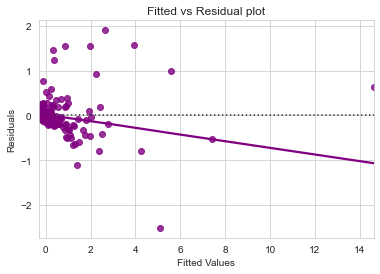

In [67]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

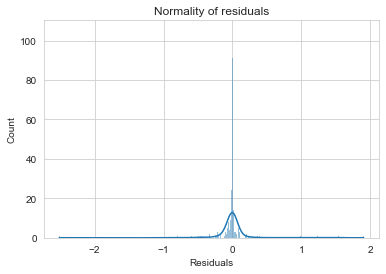

In [68]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

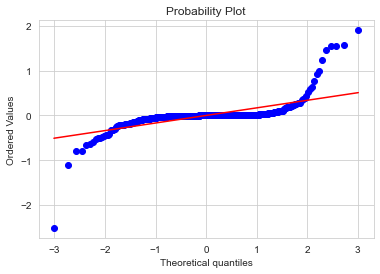

In [69]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [70]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.24961439816650766

In [71]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.3520590072129984

In [72]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.08419071412781504

In [73]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.07218065761152341

We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
MAE indicates that our current model is able to predict sales within a mean error of 0.07 units on the test data.
Hence, we can conclude the model "ols_res12" is excellent for prediction as well as inference purposes.

1.4) Inference: Based on these predictions, what are the business insights and recommendations.

Conclusion

The final Linear Regression equation is

sales = -0.0026976549480944656 + 0.3144643716579352 * ( capital ) +  0.1877071035767714 * ( randd ) +  0.4281775881727028 * ( employment ) +  0.08186917601013671 * ( value )

R-squared of the model is 0.936 and adjusted R-squared is 0.935, which shows that the model is able to explain ~93.5% variance in the data. This is extremely good.

A unit increase in the capital will result in a 0.3145 unit increase in the sales, all other variables remaining constant.

A unit increase in the R&D will result in a 0.1877 unit increase in the sales, all other variables remaining constant.

A unit increase in the employment will result in a 0.4282 unit increase in the sales, all other variables remaining constant.(MOST IMPORTANT ATTRIBUTE)

A unit increase in the Stock market value will result in a 0.0819 unit increase in the sales, all other variables remaining constant.

### Insights

1)5 most important attributes are "capital","randd","employment","value" & "sp500". 
Sales can now be predicted using our final linear regression model equation and we can see how each attribute affects the sales.

2) Among all attributes employment seems to be greately affecting sales.

3) More Capital, More R&D, More Employment & More stock value will greatly affect sales of firms and we can use our linear regression model to predict sales. 

### Problem 2:Logistic Regression, LDA

You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

Questions for Problem 2:

2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
df2 = pd.read_csv("Car_Crash.csv")

In [4]:
df2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,2:13:02
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,2:17:01
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,4:58:01


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [32]:
df2.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.826781
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.373871
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [6]:
df2.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

There are 77 null values in 'injSeverity' Column

In [7]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
print(df2.shape)

(11217, 15)


In [9]:
df2[~df2.applymap(np.isreal).all(1)]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,2:13:02
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,2:17:01
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,4:58:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0,82:107:1
11213,24-Oct,71.228,survived,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0,82:108:2
11214,24-Oct,10.474,survived,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0,82:110:1
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0,82:110:2


In [11]:
df2["injSeverity"].fillna(df2["injSeverity"].median(),inplace=True)

In [12]:
df2.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [18]:
df2.drop("caseid",axis=1,inplace=True)

Null values are replaced by median values of the coloumn. 'caseid' coloumn is dropped.

UNIVARIATE ANALYSIS

In [13]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

In [26]:
for feature in df2.columns: 
    if df2[feature].dtype == 'int64': 
        print(feature)
        print(df2[feature].value_counts())
        print('\n')

frontal
1    7224
0    3993
Name: frontal, dtype: int64


ageOFocc
19    484
18    461
17    445
21    428
20    410
     ... 
90      7
92      6
97      5
93      5
95      1
Name: ageOFocc, Length: 80, dtype: int64


yearacc
2002    4764
2001    4115
2000    1716
1997     224
1999     200
1998     198
Name: yearacc, dtype: int64


yearVeh
1999    1046
2000    1019
1998     791
1995     747
1994     717
2001     695
1997     668
1993     641
1996     604
1991     585
1992     558
1989     503
1990     448
1988     394
2002     367
1987     341
1986     280
1985     217
1984     169
1983      70
1982      67
1981      55
1978      49
2003      31
1980      29
1979      28
1976      16
1969      11
1977      11
1971       8
1975       8
1974       8
1970       7
1972       5
1973       5
1966       5
1968       4
1965       3
1963       2
1956       2
1961       1
1967       1
1953       1
Name: yearVeh, dtype: int64


deploy
0    6852
1    4365
Name: deploy, dtype: int64




In [22]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print(feature)
        print(df2[feature].value_counts())
        print('\n')

dvcat
24-Oct     5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64


Survived
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64


airbag
airbag    7064
none      4153
Name: airbag, dtype: int64


seatbelt
belted    7849
none      3368
Name: seatbelt, dtype: int64


sex
m    6048
f    5169
Name: sex, dtype: int64


abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64


occRole
driver    8786
pass      2431
Name: occRole, dtype: int64




'dvcat' has many entries as 24-Oct. As 10-24 group is missing we will have to change them to 10-24.

In [27]:
df2.dvcat=df2.dvcat.str.replace('24-Oct', '10-24')

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df2[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()

Description of weight
----------------------------------------------------------------------------
count    11217.000000
mean       431.405309
std       1406.202941
min          0.000000
25%         28.292000
50%         82.195000
75%        324.056000
max      31694.040000
Name: weight, dtype: float64 Distribution of weight
----------------------------------------------------------------------------


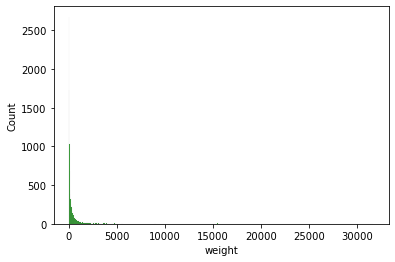

BoxPlot of weight
----------------------------------------------------------------------------


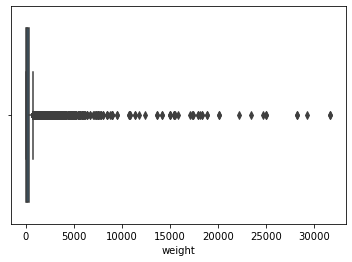

Description of frontal
----------------------------------------------------------------------------
count    11217.000000
mean         0.644022
std          0.478830
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: frontal, dtype: float64 Distribution of frontal
----------------------------------------------------------------------------


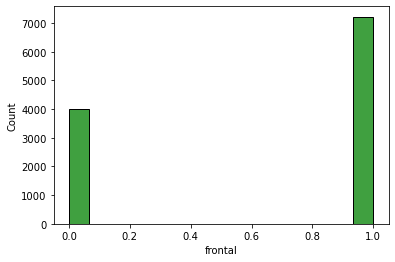

BoxPlot of frontal
----------------------------------------------------------------------------


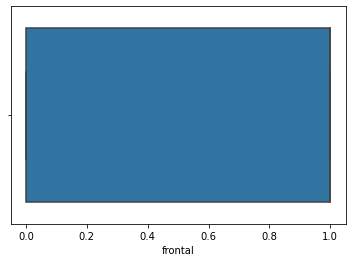

Description of ageOFocc
----------------------------------------------------------------------------
count    11217.000000
mean        37.427654
std         18.192429
min         16.000000
25%         22.000000
50%         33.000000
75%         48.000000
max         97.000000
Name: ageOFocc, dtype: float64 Distribution of ageOFocc
----------------------------------------------------------------------------


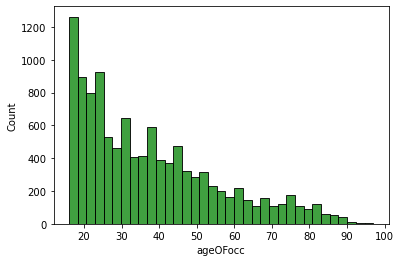

BoxPlot of ageOFocc
----------------------------------------------------------------------------


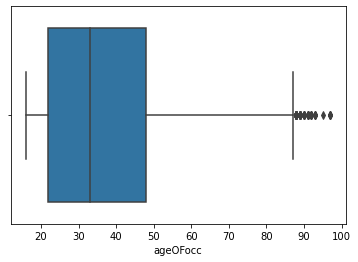

Description of yearacc
----------------------------------------------------------------------------
count    11217.000000
mean      2001.103236
std          1.056805
min       1997.000000
25%       2001.000000
50%       2001.000000
75%       2002.000000
max       2002.000000
Name: yearacc, dtype: float64 Distribution of yearacc
----------------------------------------------------------------------------


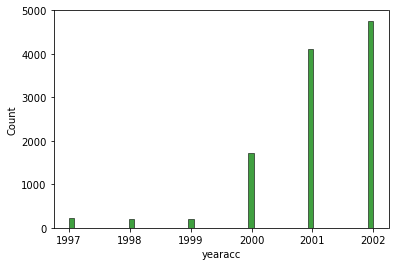

BoxPlot of yearacc
----------------------------------------------------------------------------


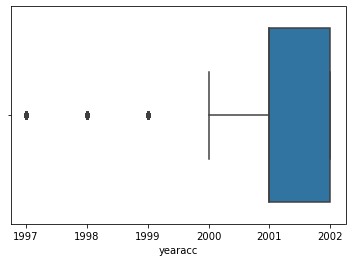

Description of yearVeh
----------------------------------------------------------------------------
count    11217.000000
mean      1994.177944
std          5.658704
min       1953.000000
25%       1991.000000
50%       1995.000000
75%       1999.000000
max       2003.000000
Name: yearVeh, dtype: float64 Distribution of yearVeh
----------------------------------------------------------------------------


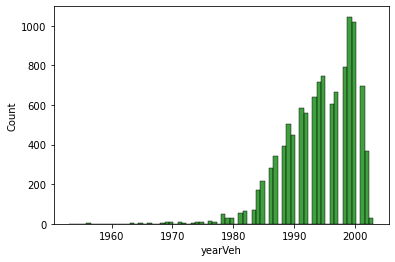

BoxPlot of yearVeh
----------------------------------------------------------------------------


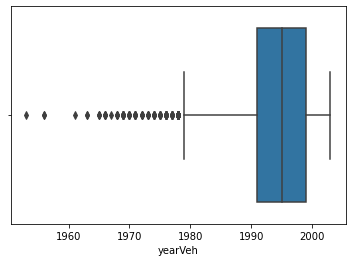

Description of deploy
----------------------------------------------------------------------------
count    11217.000000
mean         0.389141
std          0.487577
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deploy, dtype: float64 Distribution of deploy
----------------------------------------------------------------------------


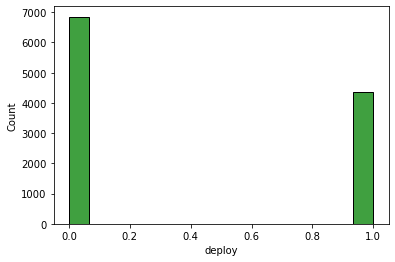

BoxPlot of deploy
----------------------------------------------------------------------------


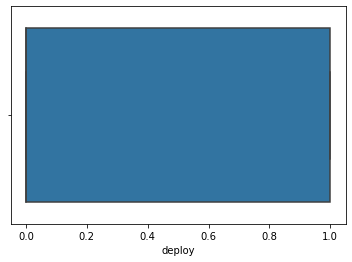

Description of injSeverity
----------------------------------------------------------------------------
count    11217.000000
mean         1.826781
std          1.373871
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: injSeverity, dtype: float64 Distribution of injSeverity
----------------------------------------------------------------------------


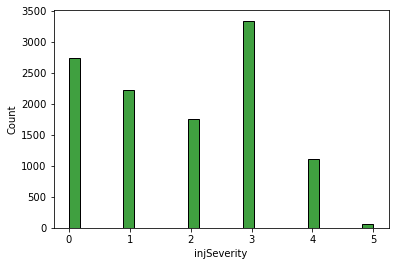

BoxPlot of injSeverity
----------------------------------------------------------------------------


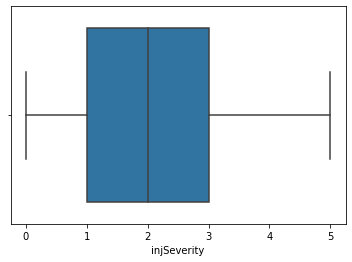

In [15]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

There are many outliers in the data.

Frontal impacts are more as compared to non frontal impacts.

The average age of occupants of car is 37 years, minimum age is 16 years and maximum 97 years.

Count of accidents has increased drastically from around 200 (year 1997) to around 4800 (year 2002).

The model year of vehicles are maximum from the year 1998-2000.

In [28]:
df_cat = df2.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of dvcat
----------------------------------------------------------------
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64


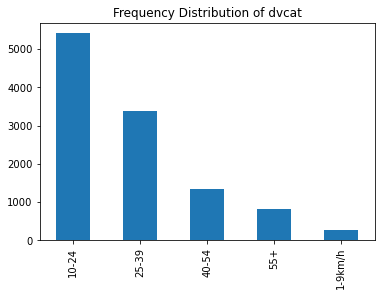

       
Details of Survived
----------------------------------------------------------------
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64


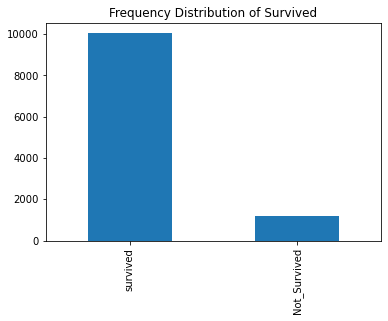

       
Details of airbag
----------------------------------------------------------------
airbag    7064
none      4153
Name: airbag, dtype: int64


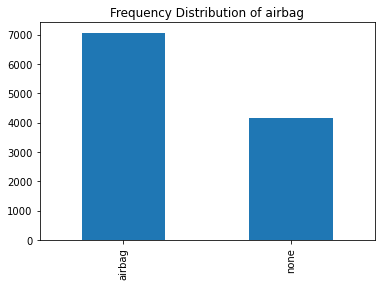

       
Details of seatbelt
----------------------------------------------------------------
belted    7849
none      3368
Name: seatbelt, dtype: int64


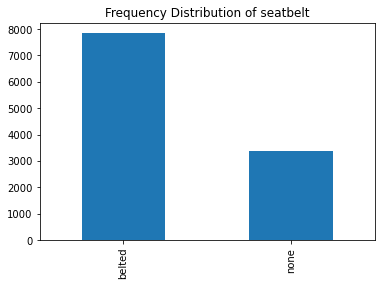

       
Details of sex
----------------------------------------------------------------
m    6048
f    5169
Name: sex, dtype: int64


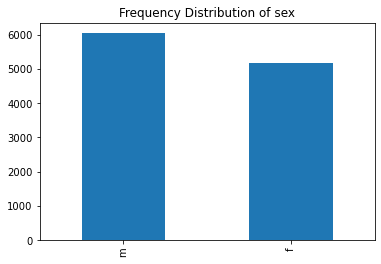

       
Details of abcat
----------------------------------------------------------------
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64


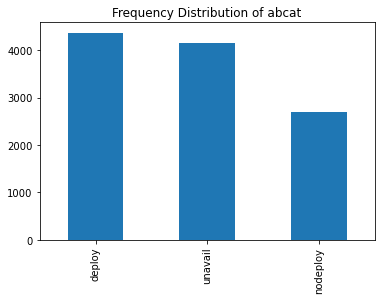

       
Details of occRole
----------------------------------------------------------------
driver    8786
pass      2431
Name: occRole, dtype: int64


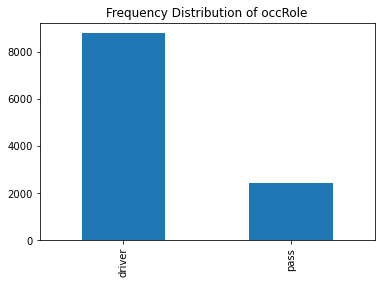

In [29]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

Highest number of count of impact speed was of range 10-24 km per hour.

Only 10037 survived and 1180 didn't survive.

7064 cars did have airbags and 4153 cars didn't have it.

7849 were seatbelted and 3368 weren't seatbelted.

BIVARIATE ANALYSIS

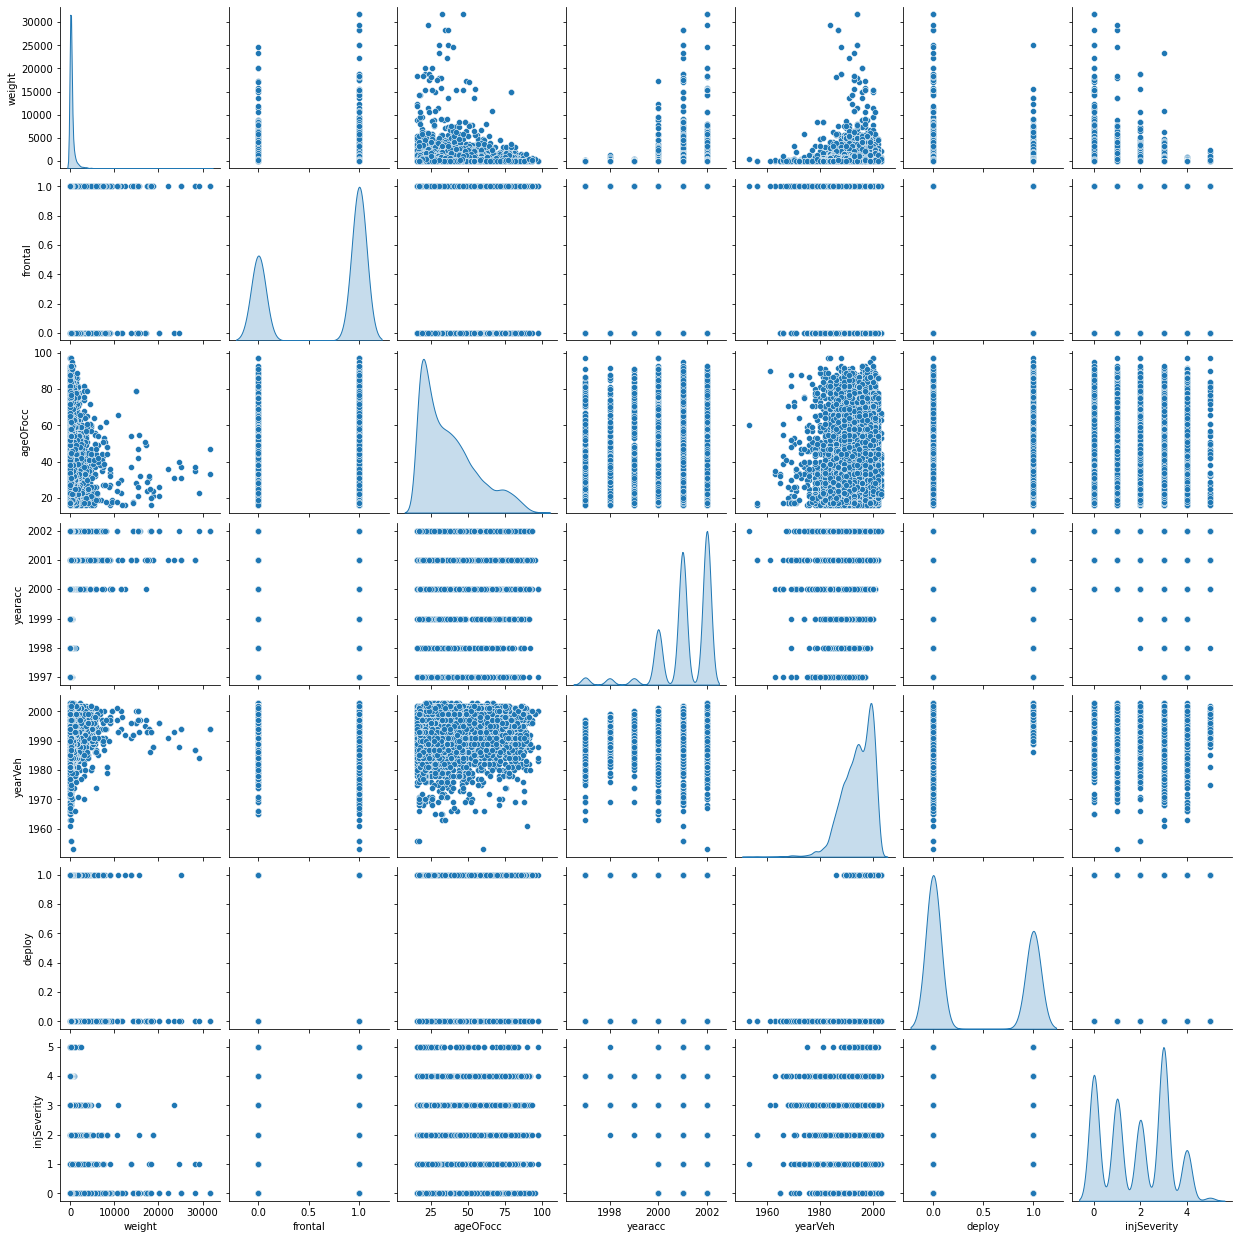

In [30]:
cData_attr = df2.iloc[:, 0:14]
sns.pairplot(
    cData_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

There seems to be non linear relationship between weight and ageoFocc.

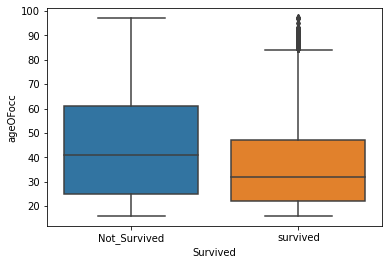

In [33]:
sns.boxplot(df2['Survived'],df2['ageOFocc']);

ageOFocc shows some skewness in the distribution between survived and not survived. Distribution is much wider for not survived. Median of Not survived is higher than Survived.

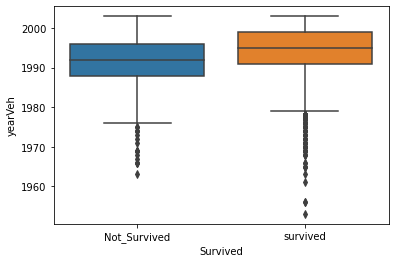

In [34]:
sns.boxplot(df2['Survived'],df2['yearVeh']);

The distribution is almost similar. 

MULTIVARIATE ANALYSIS

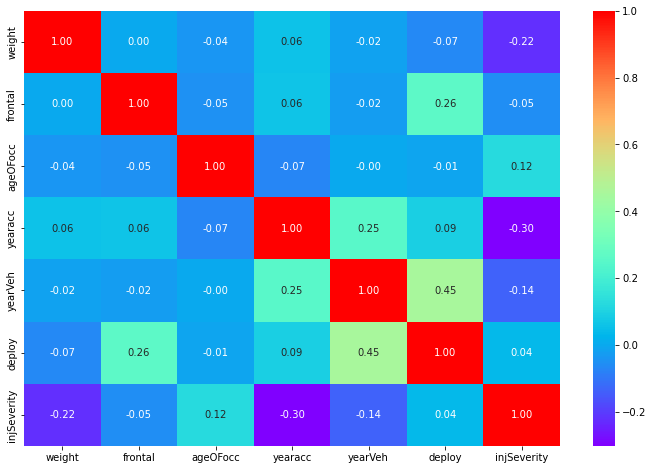

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.iloc[:,0:14].corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

There seems to be a correlation between frontal & deploy, deploy & yearVeh.

2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

# Converting all objects to categorical codes

In [35]:
## Converting the 'Survived' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [36]:
df2['Survived'] = LE.fit_transform(df2['Survived'])
df2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,0,none,none,1,m,32,1997,1987,unavail,driver,0,4.0
1,25-39,89.627,0,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0
2,55+,27.078,0,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,0,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,0,none,none,1,m,23,1997,1986,unavail,driver,0,4.0


0 means not survived and 1 means survived

In [37]:
df2

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,0,none,none,1,m,32,1997,1987,unavail,driver,0,4.0
1,25-39,89.627,0,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0
2,55+,27.078,0,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,0,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,0,none,none,1,m,23,1997,1986,unavail,driver,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,1,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0
11213,10-24,71.228,1,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0
11214,10-24,10.474,1,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0
11215,25-39,10.474,1,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0


In [38]:
## Converting the other 'object' type variables as dummy variables

df23 = pd.get_dummies(df2,drop_first=True)
df23.head()

,weight,Survived,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,dvcat_10-24,dvcat_25-39,dvcat_40-54,dvcat_55+,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,27.078,0,1,32,1997,1987,0,4.0,0,0,0,1,1,1,1,0,1,0
1,89.627,0,0,54,1997,1994,0,4.0,0,1,0,0,0,0,0,1,0,0
2,27.078,0,1,67,1997,1992,0,4.0,0,0,0,1,1,0,1,0,1,0
3,27.078,0,1,64,1997,1992,0,4.0,0,0,0,1,1,0,0,0,1,1
4,13.374,0,1,23,1997,1986,0,4.0,0,0,0,1,1,1,1,0,1,0


Train Test Split

In [43]:
# Copy all the predictor variables into X dataframe
X1 = df23.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y1 = df23['Survived']

In [44]:
#`
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1,stratify= df23['Survived'])

In [45]:
y1_train.value_counts(1)

1    0.89479
0    0.10521
Name: Survived, dtype: float64

In [46]:
y1_test.value_counts(1)

1    0.894831
0    0.105169
Name: Survived, dtype: float64

### Logistic Regression model

In [48]:
# Fit the Logistic Regression model using newton cg as it's a multiclass problem
model1 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model1.fit(X1_train, y1_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   15.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [49]:
model1.score(X1_train, y1_train)

0.980639408992485

### Build LDA Model

In [69]:
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X1_train,y1_train)

In [70]:
model2.score(X1_train, y1_train)

0.9575850210164311

2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized. 

### PERFORMANCE OF LOGISTIC REGRESSION MODEL

In [86]:
y1train_predict = model1.predict(X1_train)
y1test_predict = model1.predict(X1_test)

In [87]:
y1test_predict_prob=model1.predict_proba(X1_test)
pd.DataFrame(y1test_predict_prob).head()

,0,1
0,0.018094,0.981906
1,0.001743,0.998257
2,0.002434,0.997566
3,0.000009,0.999991
4,0.011599,0.988401


In [88]:
# Accuracy - Training Data
model1.score(X1_train, y1_train)

0.980639408992485

AUC: 0.991


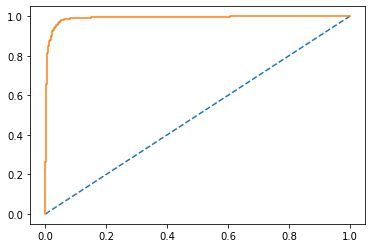

In [89]:
# predict probabilities
probs = model1.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y1_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [90]:
# Accuracy - Test Data
model1.score(X1_test, y1_test)

0.9833630421865716

AUC: 0.991


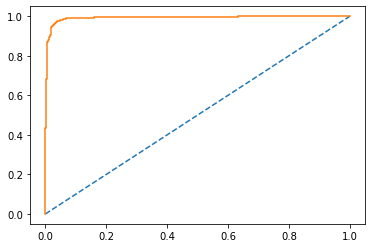

In [91]:
# predict probabilities
probs = model1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [92]:
confusion_matrix(y1_train, y1train_predict)

array([[ 729,   97],
       [  55, 6970]], dtype=int64)

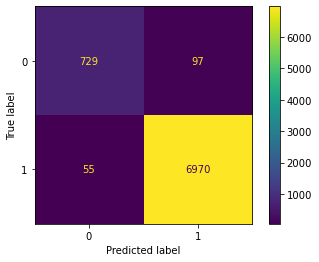

In [93]:
plot_confusion_matrix(model1,X1_train,y1_train);

In [94]:
print(classification_report(y1_train, y1train_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



In [95]:
confusion_matrix(y1_test, y1test_predict)

array([[ 318,   36],
       [  20, 2992]], dtype=int64)

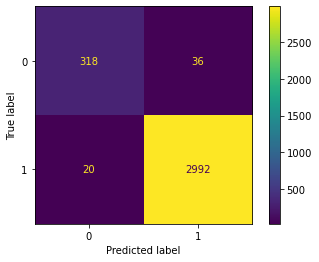

In [96]:
plot_confusion_matrix(model1,X1_test,y1_test);

In [97]:
print(classification_report(y1_test, y1test_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.95      0.95      3366
weighted avg       0.98      0.98      0.98      3366



In [98]:
model1.coef_

array([[ 3.62382772e-03,  1.31845822e+00, -3.65377551e-02,
         1.05770229e+00, -4.57673622e-03, -5.96480468e+02,
        -4.01683297e+00, -2.11444248e+00, -3.39027482e+00,
        -4.19575609e+00, -5.16335093e+00, -2.98296408e+02,
        -7.44159977e-01, -4.25084177e-01, -5.96020522e+02,
        -2.98296408e+02, -5.46379040e-01]])

In [105]:
b=model1.coef_
np.round(b,2)

array([[ 0.0000e+00,  1.3200e+00, -4.0000e-02,  1.0600e+00, -0.0000e+00,
        -5.9648e+02, -4.0200e+00, -2.1100e+00, -3.3900e+00, -4.2000e+00,
        -5.1600e+00, -2.9830e+02, -7.4000e-01, -4.3000e-01, -5.9602e+02,
        -2.9830e+02, -5.5000e-01]])

In [107]:
X1_test.columns

Index(['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy',
       'injSeverity', 'dvcat_10-24', 'dvcat_25-39', 'dvcat_40-54', 'dvcat_55+',
       'airbag_none', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass'],
      dtype='object')

### CONCLUSION
                                                                                           
                                                                                           Note :

                                                     Precison : tells us how many predictions are actually positive

                                                                out of all the total positive predicted.

                                                     Recall   : how many observations of positive class are actually 

                                                                predicted as positive. 
### Inferences :
For predicting Not survived (Label 0 ):

Precision (94%) – 94% of people predicted actually not survive out of all people predicted to not survive.

Recall (90%) – Out of all the people actually not survive, 90% of people have been predicted correctly .

For predicting Survived (Label 1 ):

Precision (99%) – 99% of employees predicted actually survive out of all people predicted to survive.

Recall (99%) – Out of all the people actually survived , 99% of employees have been predicted correctly .

Overall accuracy of the model – 98 % of total predictions are correct
Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

### PERFORMANCE OF LDA MODEL

In [71]:
#intercept value
clf.intercept_ 

array([-4773.68800372])

In [72]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-1.20355227e-04,  9.10496861e-01, -2.87947123e-02,
         2.41304978e+00, -2.24991158e-02,  8.61793867e-02,
        -1.40266826e+00,  2.26087823e-01,  1.66988570e-01,
        -1.47310149e+00, -4.94362568e+00, -6.93136779e-02,
        -4.75384331e-01, -4.64220076e-01, -2.60764524e-02,
        -6.93136779e-02, -4.30119992e-01]])

In [73]:
X1_train.columns

Index(['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy',
       'injSeverity', 'dvcat_10-24', 'dvcat_25-39', 'dvcat_40-54', 'dvcat_55+',
       'airbag_none', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass'],
      dtype='object')

#### Linear Discriminant Function 


= -4773.68800372 + (-1.20355227e-04xweight)+ (9.10496861e-01xfrontal)+ (-2.87947123e-02xageOFocc) +.... + (-4.30119992e-01xoccRole_pass)

In [74]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.  ,  0.91, -0.03,  2.41, -0.02,  0.09, -1.4 ,  0.23,  0.17,
        -1.47, -4.94, -0.07, -0.48, -0.46, -0.03, -0.07, -0.43]])

#### By the above equation and the coefficients it is clear that 
- predictor 'yearacc' has the largest magnitude thus this helps in classifying the best 
- predictor 'dvcat_55+' has the smallest magnitude thus this helps in classifying the least 

In [75]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model2.predict(X1_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model2.predict(X1_test)

### Training Data and Test Data Confusion Matrix Comparison

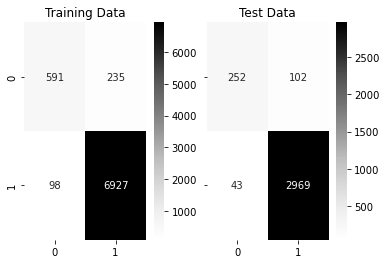

In [76]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y1_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y1_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [77]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y1_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y1_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.72      0.78       826
           1       0.97      0.99      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.91      0.85      0.88      7851
weighted avg       0.96      0.96      0.96      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.71      0.78       354
           1       0.97      0.99      0.98      3012

    accuracy                           0.96      3366
   macro avg       0.91      0.85      0.88      3366
weighted avg       0.95      0.96      0.96      3366
 



In [78]:
# Training Data Probability Prediction
pred_prob_train = model2.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = model2.predict_proba(X1_test)

In [79]:
pred_prob_train[:,1]

array([0.99997484, 0.99998169, 0.88814289, ..., 0.99885189, 0.99876605,
       0.99999175])

### AUC & ROC FOR TRAINING AND TEST DATA

AUC for the Training Data: 0.968
AUC for the Test Data: 0.967


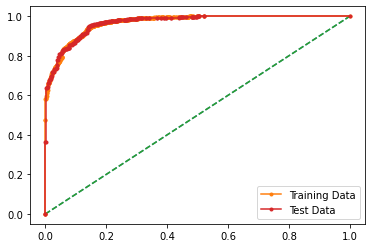

In [80]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### CONCLUSION
                                                                                           
                                                                                           Note :

                                                     Precison : tells us how many predictions are actually positive

                                                                out of all the total positive predicted.

                                                     Recall   : how many observations of positive class are actually 

                                                                predicted as positive. 
### Inferences :
For predicting Not survived (Label 0 ):

Precision (85%) – 85% of people predicted actually not survive out of all people predicted to not survive.

Recall (71%) – Out of all the people actually not survive, 71% of people have been predicted correctly .

For predicting Survived (Label 1 ):

Precision (97%) – 97% of employees predicted actually survive out of all people predicted to survive.

Recall (99%) – Out of all the people actually survived , 99% of employees have been predicted correctly .

Overall accuracy of the model – 96 % of total predictions are correct
Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

### LOGISTIC REGRESSION MODEL IS BEST/OPTIMISED as the accuracy,AUC,Precision and Recall are greater as compared to the LDA model.

2.4) Inference: Based on these predictions, what are the insights and recommendations.

### INSIGHTS AND RECOMMENDATIONS

1. Based on the logistic regression model with 98% accuracy, frontal impact seems to be the most important attritube in determining whether person has survived or not.

2. To decrease the frontal impact government should make strict laws for manufacturers of cars to include good airbags in all cars for the safety of all passengers. 

3. Strict laws should be made to ensure passengers always put their seatbelts to lesser the impact of car crash.

4. Good quality airbags with very fast deploy rate should be installed in all cars to ensure safety of all passengers.

5. Regular airbag testing should be made mandatory by the government to ensure that airbags do deploy in all cars when there is an impact of car crash.

6. Estimated impact speeds was of range 10-24 km/hr, design should be built to reduce impact speed to decrease damage to passengers.